In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import glob
%matplotlib inline

from astropy.table import Table
from astropy import units as u
import astropy.constants
from astropy.io import ascii,fits


from telfit import TelluricFitter, DataStructures
from telfit import Modeler


from scipy.optimize import curve_fit
from astropy import  convolution


DEIMOS_DATA = '/Users/tac1998/thesis/'
#DEIMOS_REDUX = '/Users/mgeha/Projects/DEIMOS/'
#_SPEED_OF_LIGHT =astropy.constants.c.to_value('km/s') 

In [7]:
# RUN TELFIT SOFTWARE
# INSTALLED FROM https://github.com/freddavies/Telluric-Fitter-py3
def run_telfit(h2o,o2,wave_deimos):
    
    # HARDWIRE TO MAUNA KEA
    alt = 4.2
    lat = 19.8

    # START/END WAVELENGTH IN NM
    wavestart = 620.0
    waveend = 950.0

       
    #GENERATE A TELLURIC SPECTRUM -- DEFAULT RESOLUTION 0.001AA
    modeler = Modeler()
    print(h2o,o2)
    model = modeler.MakeModel(humidity=h2o,o2=o2,
                          lowfreq=1e7/waveend,
                          highfreq=1e7/wavestart, lat=lat, alt=alt)

    tell = model.toarray()

    # CONVERT TO ANGSTRUM
    wave = 10. * tell[:,0]
    flux = tell[:,1]
    
    # DETERMINE BINNING
    bins = wave - np.roll(wave,1) 
    print('binning = ',np.median(bins))
    
    
    # SMOOTH AND REBIN TO LINEAR 0.01A PIXELS
    sig_res = 0.01/np.median(bins)
    print('Kernal ',sig_res)
    gauss_kernel = convolution.Gaussian1DKernel(sig_res)
    smooth_flux  = convolution.convolve(flux, gauss_kernel)

    tell_flux = np.interp(wave_deimos,wave,smooth_flux)

    plt.plot(wave,flux)
    plt.plot(wave_deimos,tell_flux)
    plt.xlim(6900,6910)
    
    return tell_flux

In [8]:
# GRID OF PARAMETERS
h2o_grid = 1.*np.arange(15,95,10)
o2_grid  = 1.e5 * np.arange(0.8, 2.4,0.1)


In [9]:
# READ IN PHOENIX LINEAR WAVELENGTH GRID AND USE IT!
fwave = DEIMOS_DATA + 'WAVE_PHOENIX-ACES-AGSS-COND-2011.fits' 
fhdu  = fits.open(fwave)
wave  = fhdu[0].data
fhdu.info()

mdeimos = (wave >= 6200) & (wave <= 9500)
wave_deimos = wave[mdeimos]


Filename: /Users/tac1998/thesis/WAVE_PHOENIX-ACES-AGSS-COND-2011.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       8   (1569128,)   float64   


plt.figure(figsize=(14,5))

for h2o in h2o_grid:
    for o2 in o2_grid:

        # EXTRA '_' for reading purposes
        outname = DEIMOS_DATA + '/tellurics/telluric_0.01A_h2o_{}_o2_{:2.2f}_.dat'.format(int(h2o),o2/1.e5)

        twave = wave_deimos
        if not os.path.isfile(outname):
            tflux = run_telfit(h2o,o2, wave_deimos)
            print(outname)

            outfile = open(outname,'w')
            outfile.write('wave flux\n')
            outfile.write('# {} {} \n'.format(h2o,o2))
            for w,f in zip(twave, tflux):
                outfile.write('{:0.6f} {:0.6f}\n'.format(w,f))
            outfile.close()
            

In [10]:
path_1 = DEIMOS_DATA + '/dra1_exp2/*.dat'
files_1 = glob.glob(path_1)

folder_1 = []

for name in files_1:
    df = pd.read_csv(name, sep='\s+')
    df['S/N'] = df['FLUX'] * np.sqrt(df['IVAR'])
    folder_1.append(df)

/Users/tac1998/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


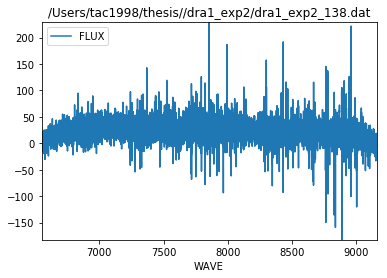

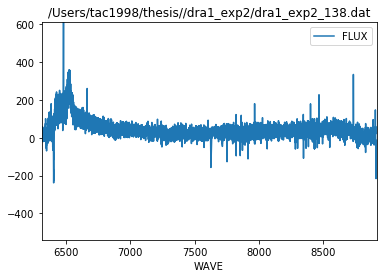

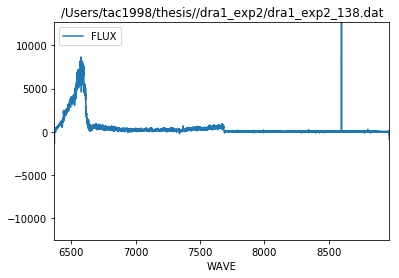

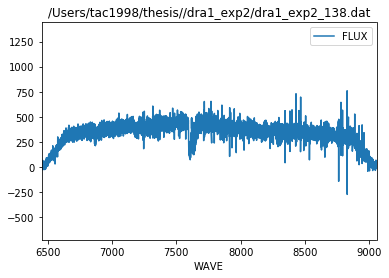

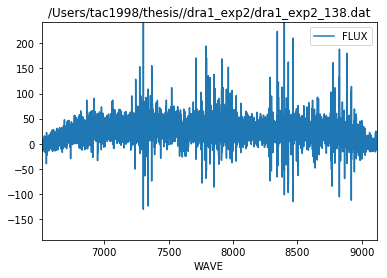

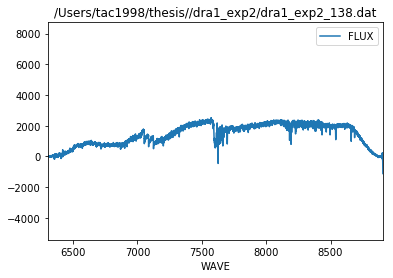

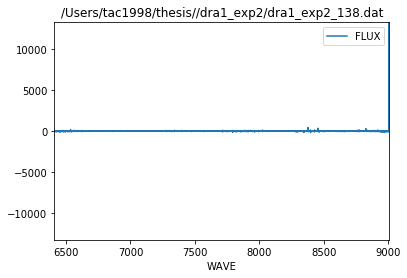

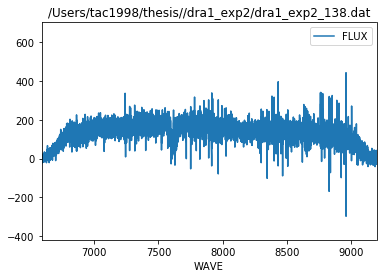

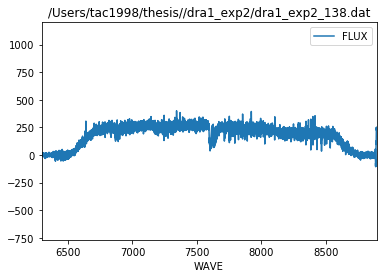

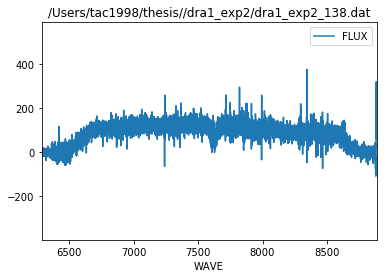

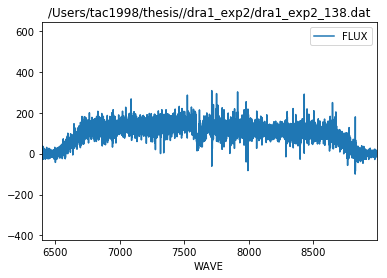

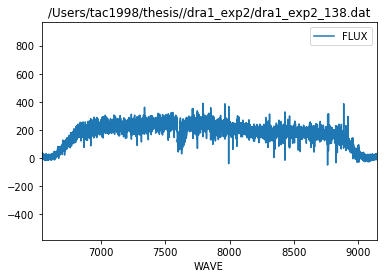

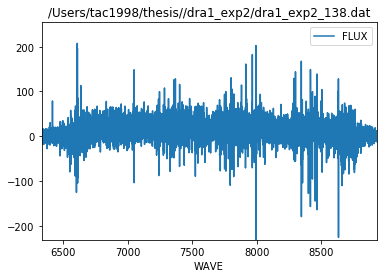

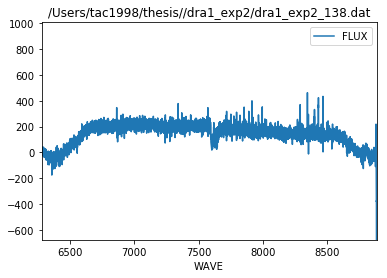

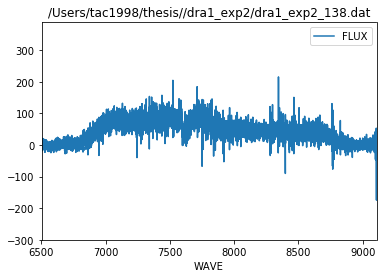

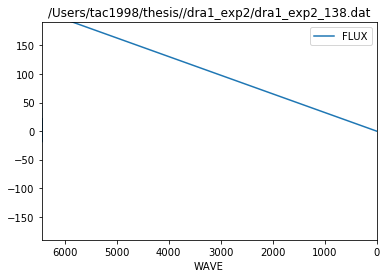

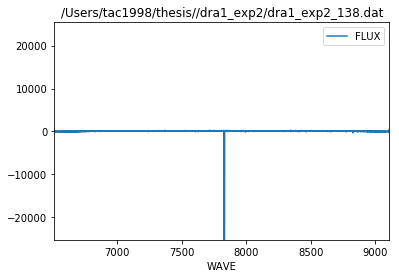

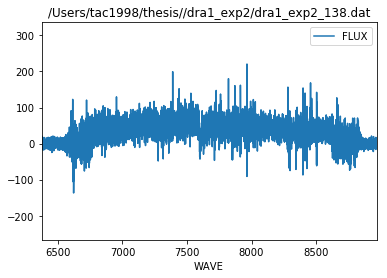

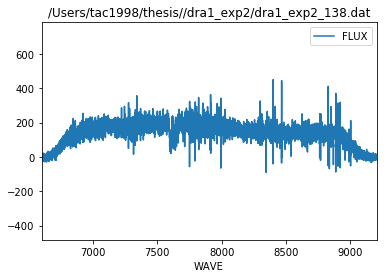

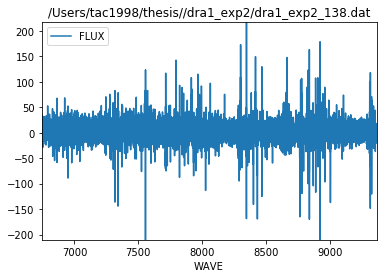

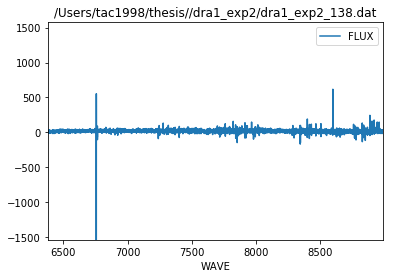

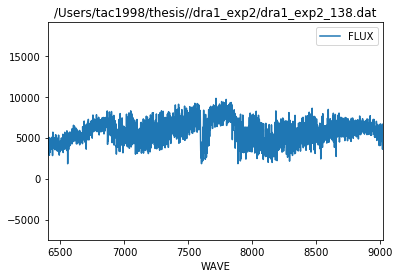

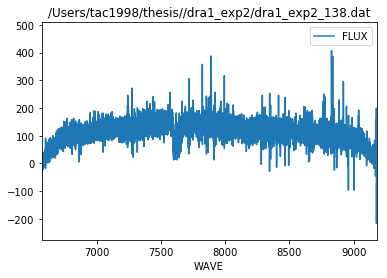

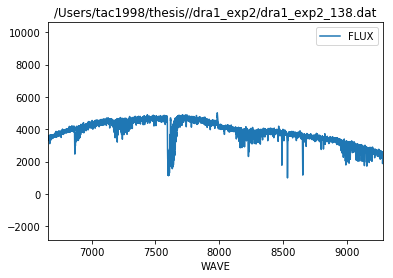

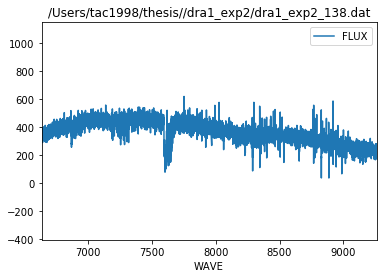

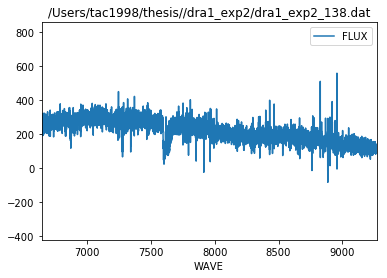

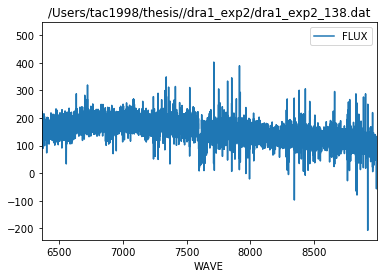

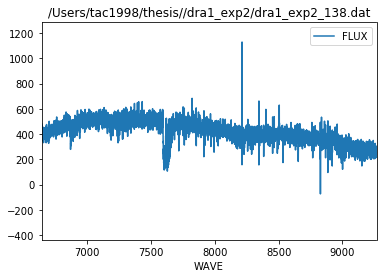

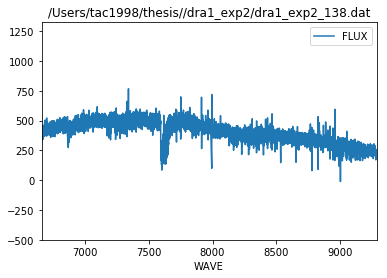

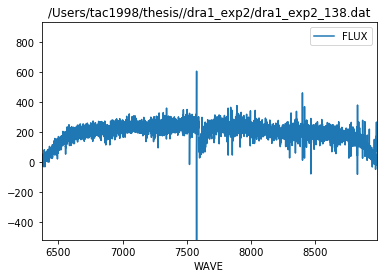

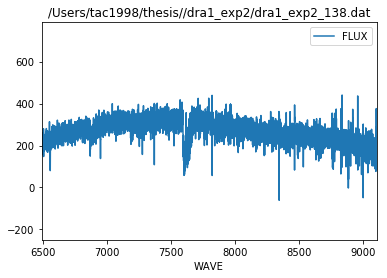

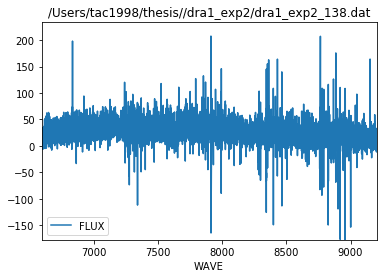

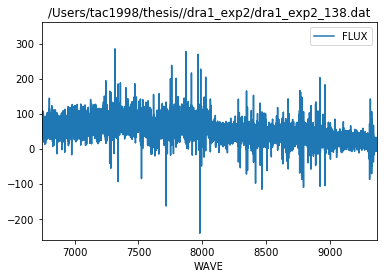

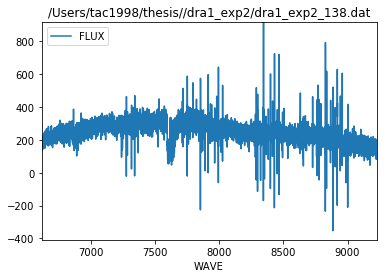

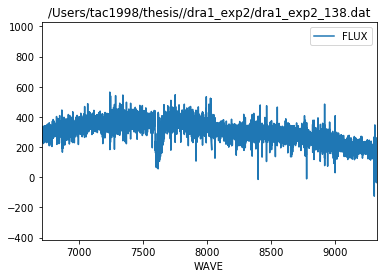

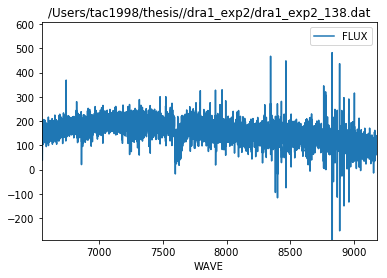

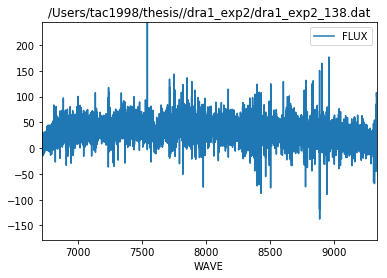

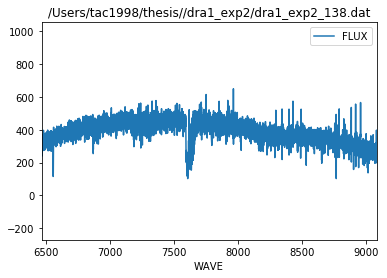

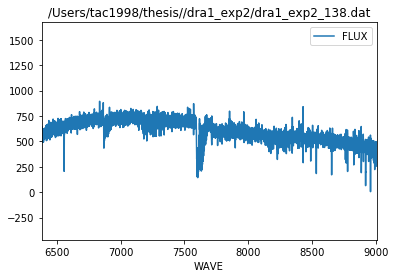

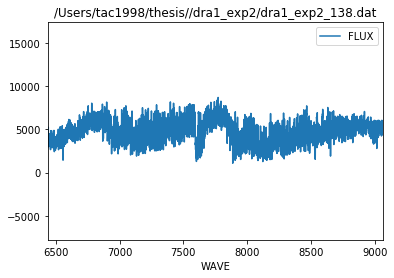

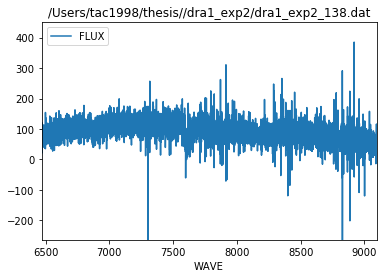

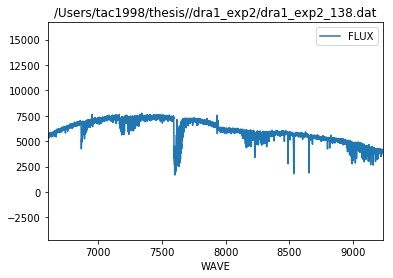

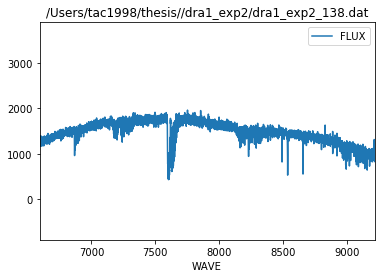

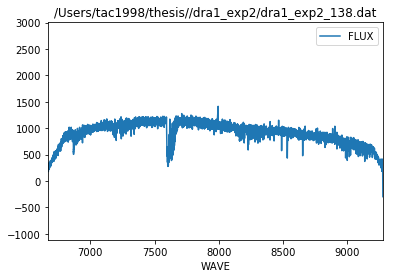

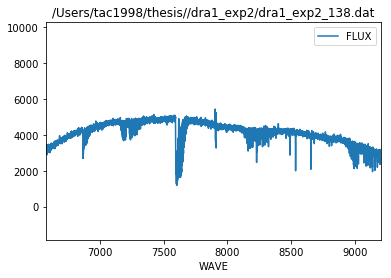

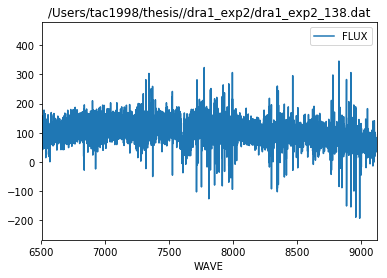

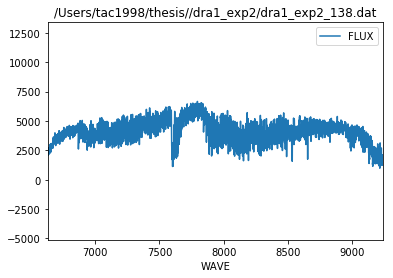

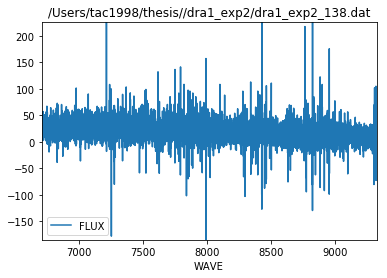

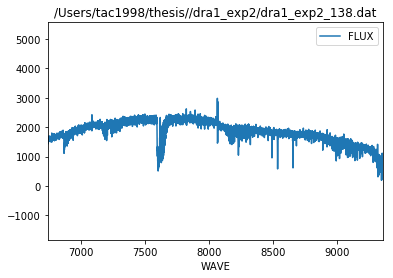

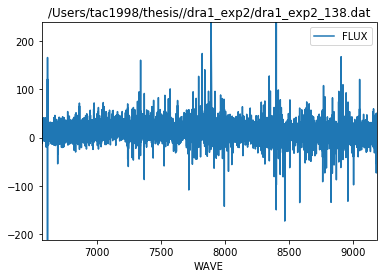

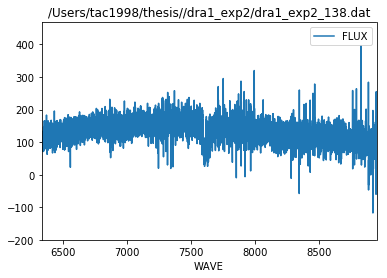

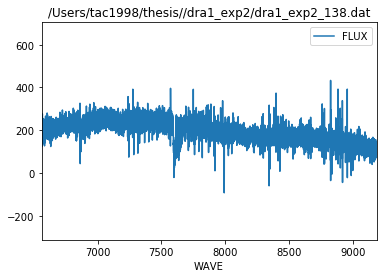

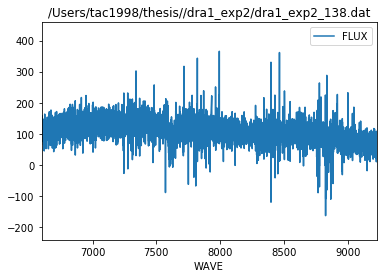

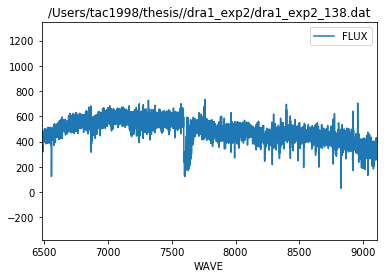

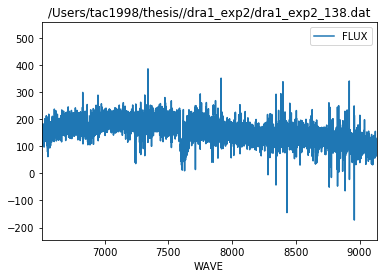

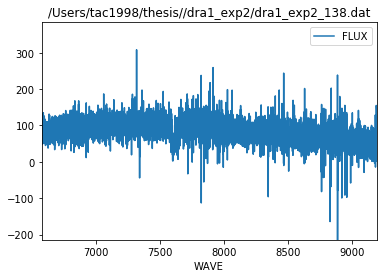

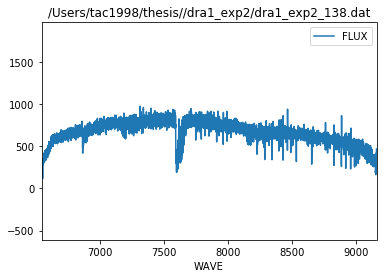

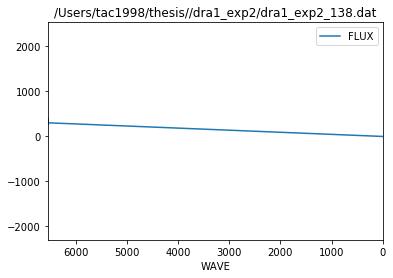

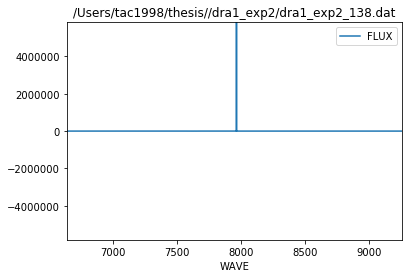

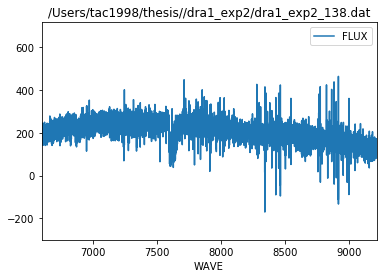

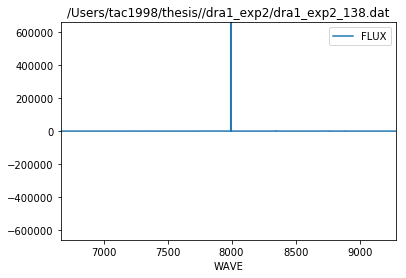

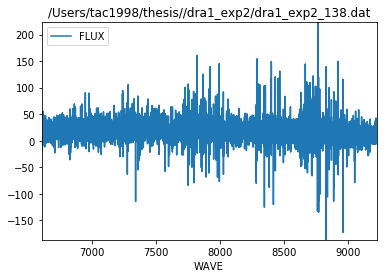

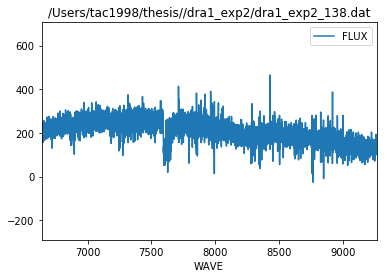

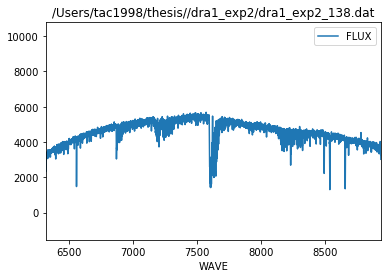

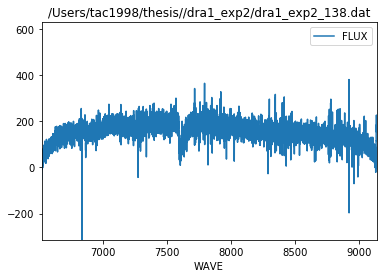

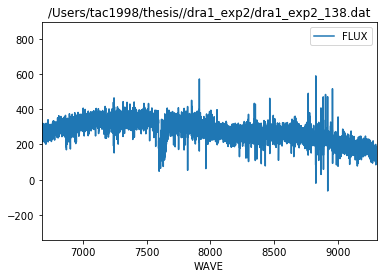

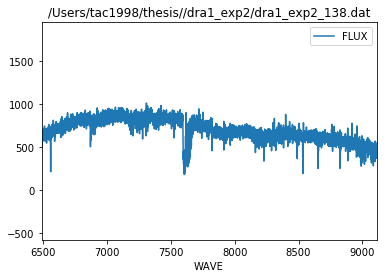

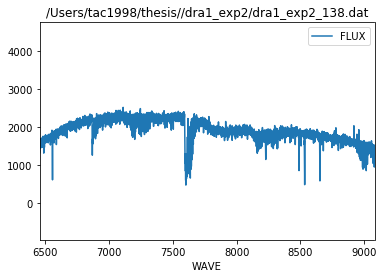

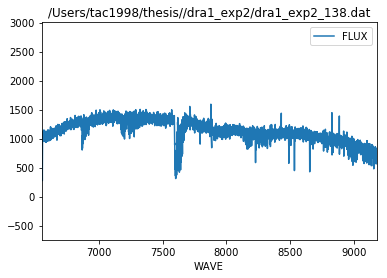

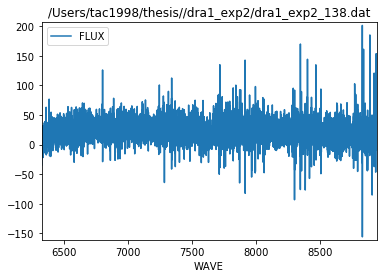

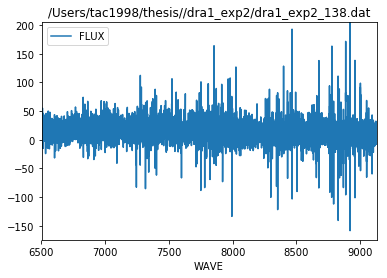

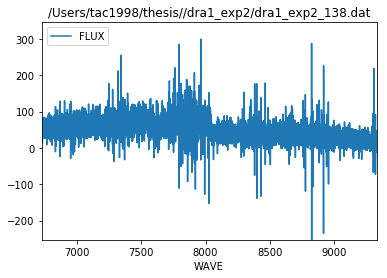

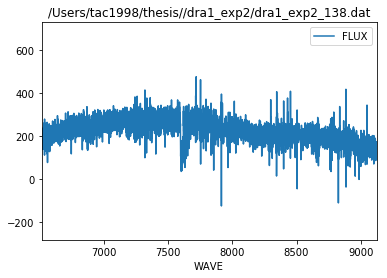

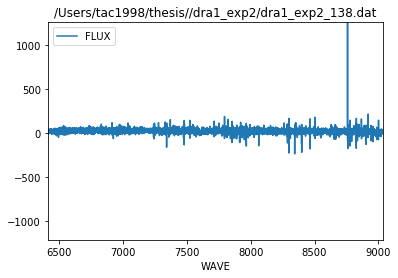

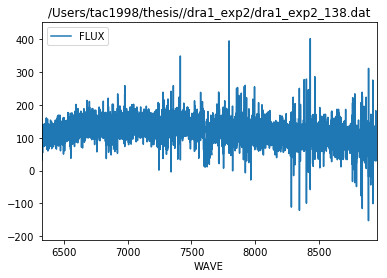

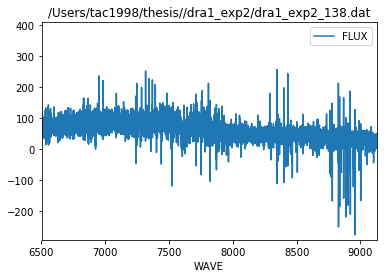

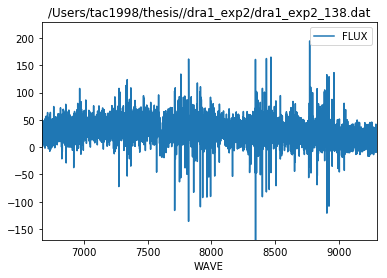

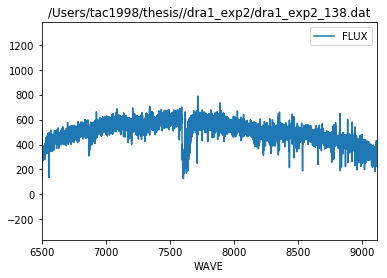

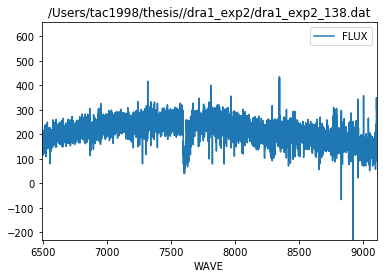

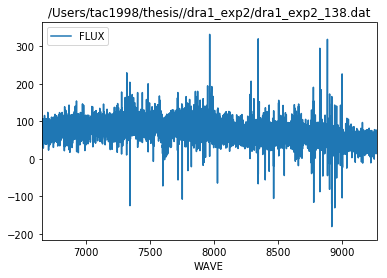

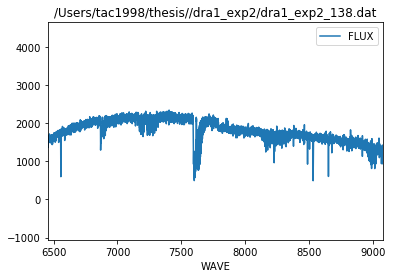

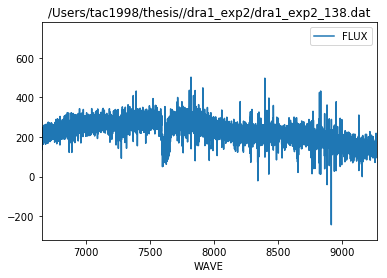

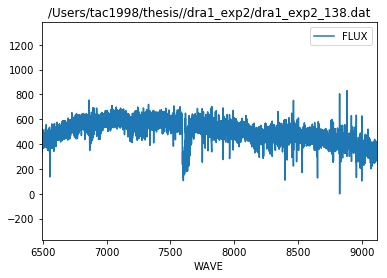

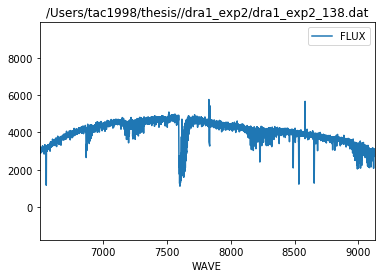

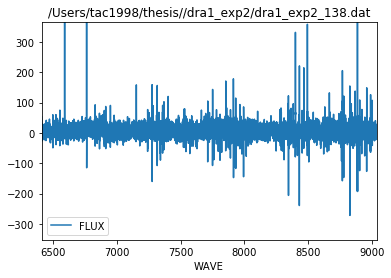

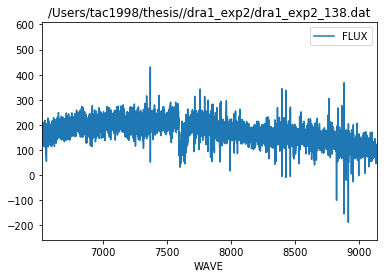

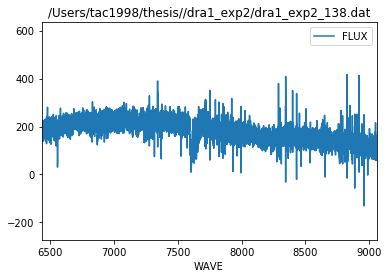

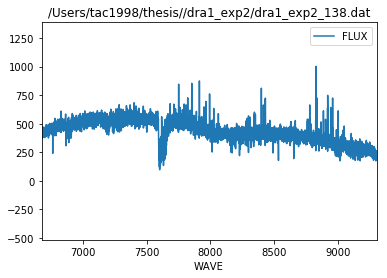

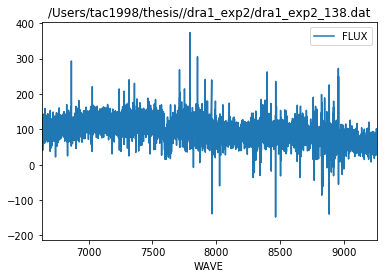

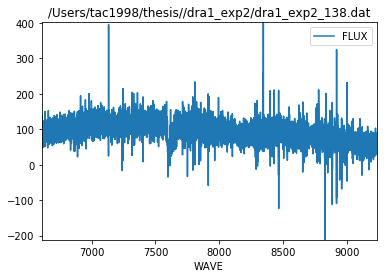

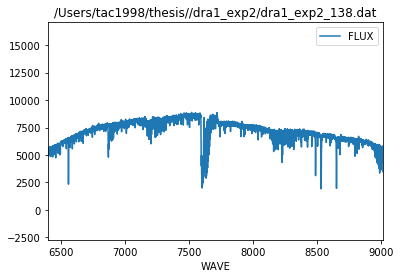

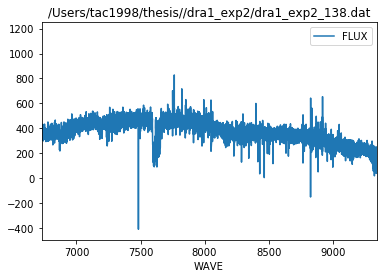

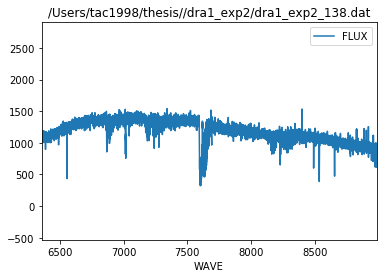

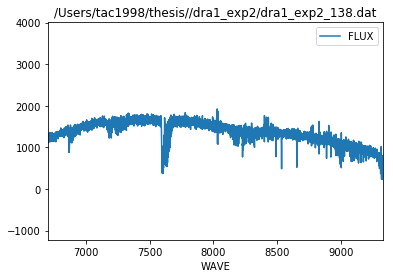

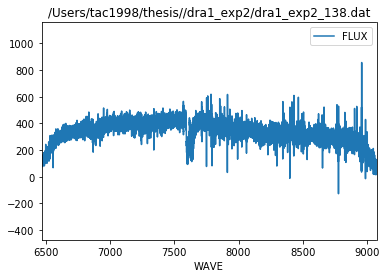

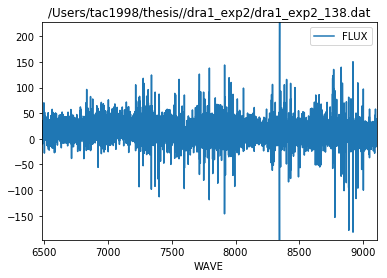

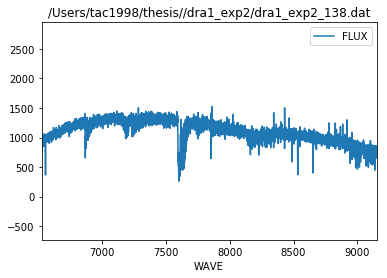

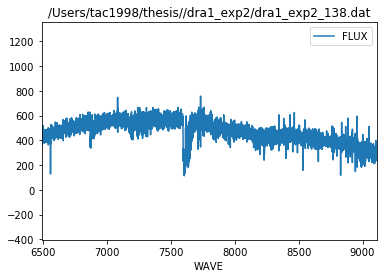

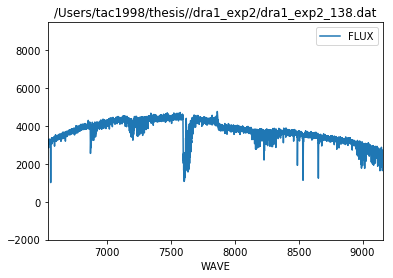

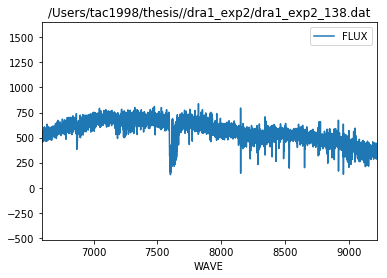

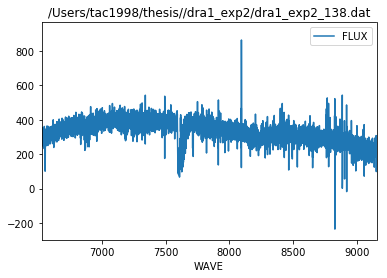

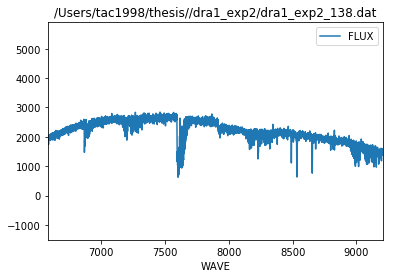

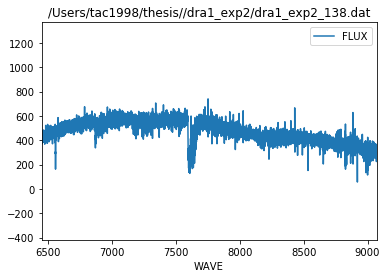

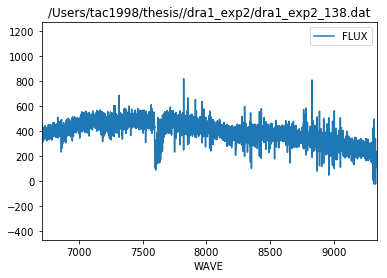

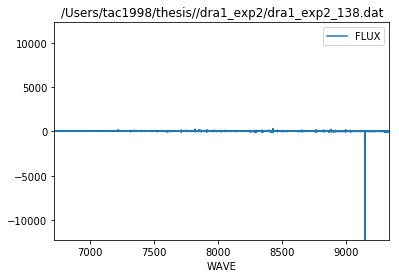

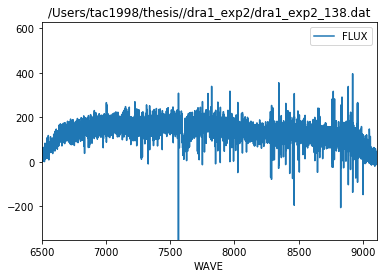

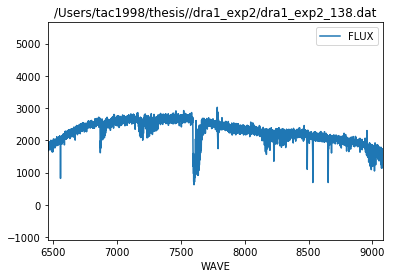

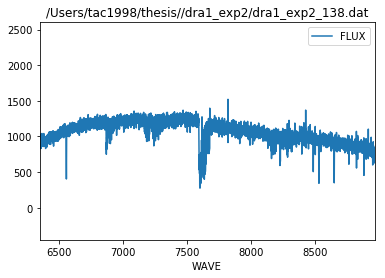

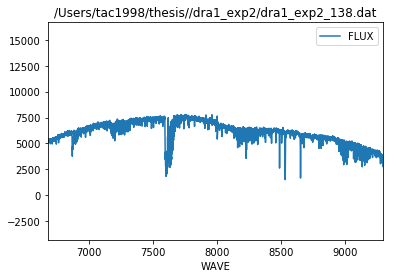

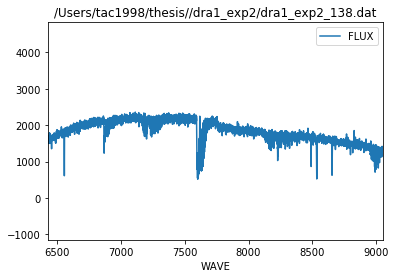

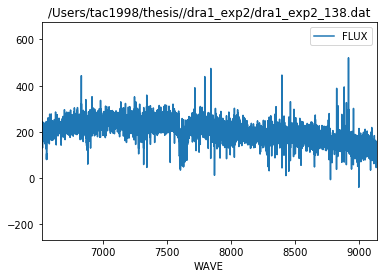

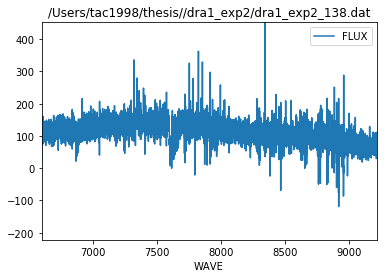

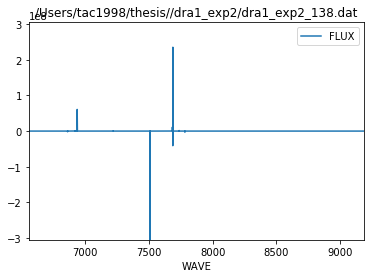

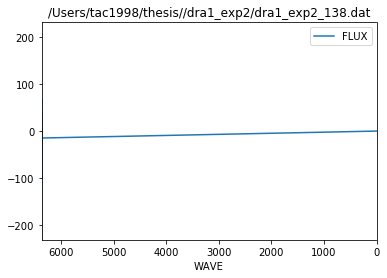

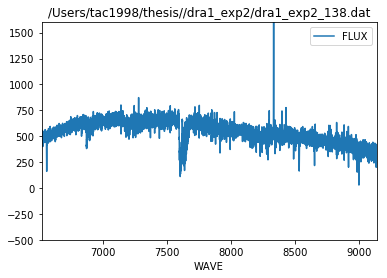

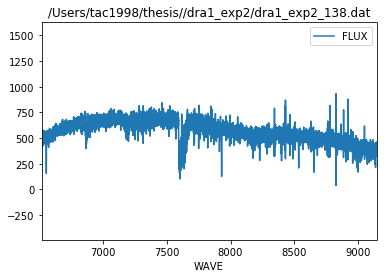

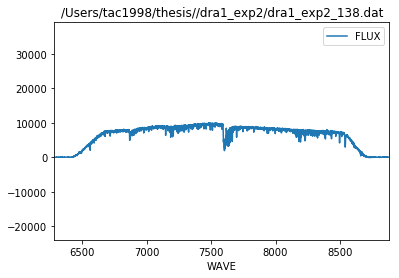

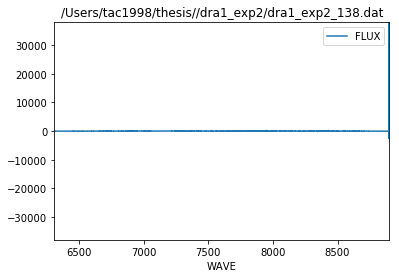

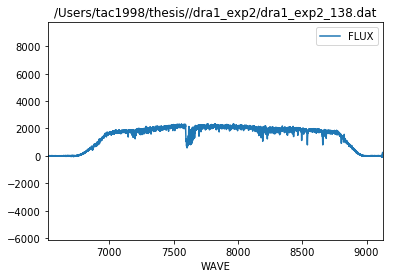

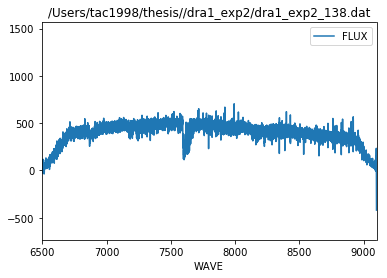

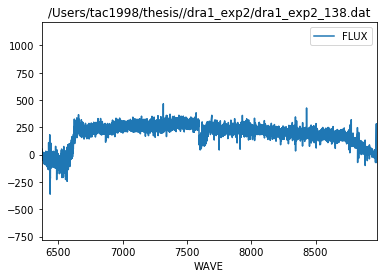

In [46]:
for file in folder_1:
    med = file['FLUX'].median()
    std = file['FLUX'].std()
    file.plot(x='WAVE', y='FLUX', title=name, ylim=[med - 10*std, med + 10*std])

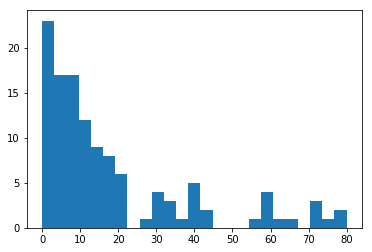

In [7]:
SN_folder1 = []
for file in folder_1:
    SN_median = file.loc[:,'S/N'].median()
    SN_folder1.append(SN_median)
    
plt.hist(SN_folder1, bins=25);

In [48]:
path_2 = DEIMOS_DATA + '/uss-1/*.dat'
files_2 = glob.glob(path_2)

folder_2 = []

for name in files_2:
    df = pd.read_csv(name, sep='\s+')
    df['S/N'] = df['FLUX'] * np.sqrt(df['IVAR'])
    folder_2.append(df)

/Users/tac1998/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


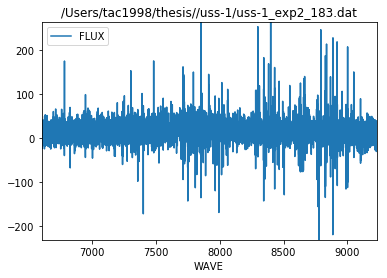

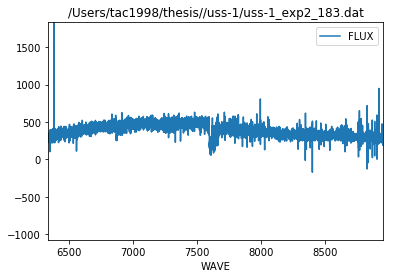

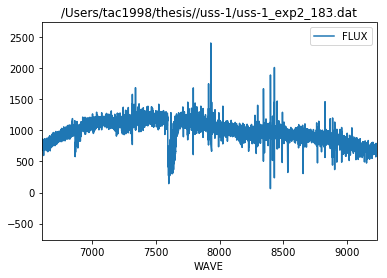

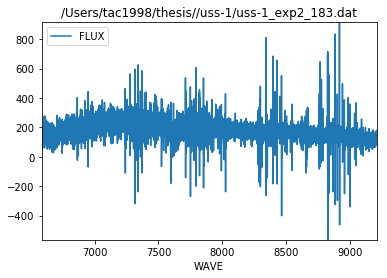

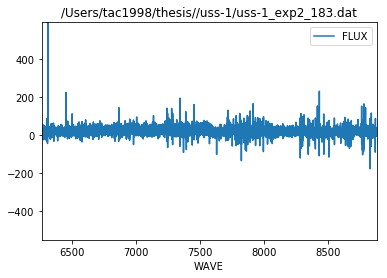

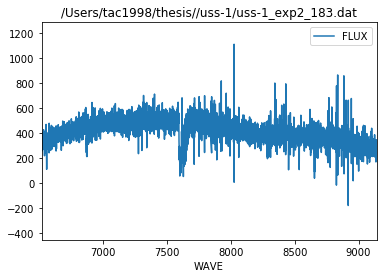

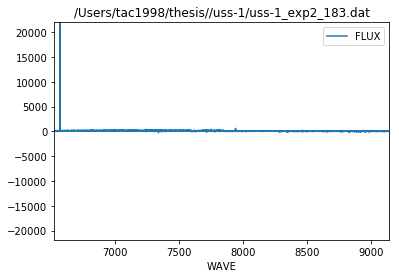

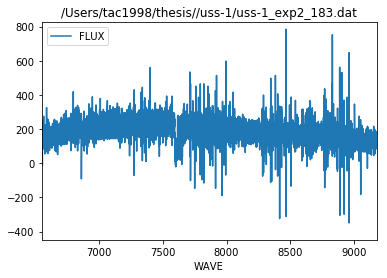

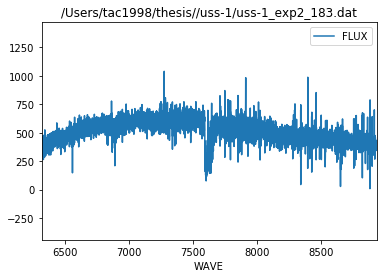

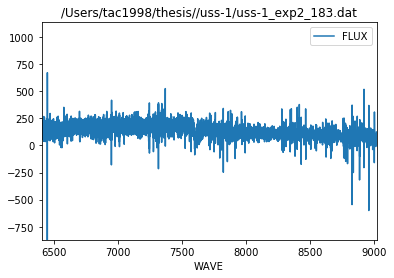

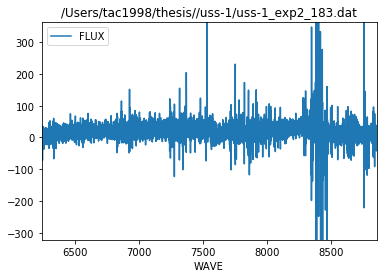

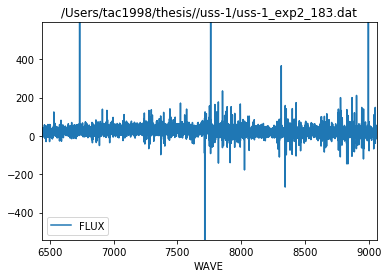

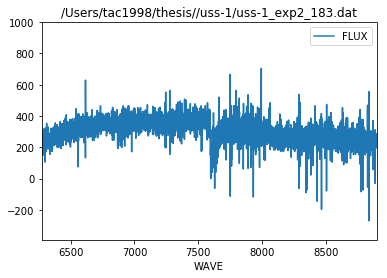

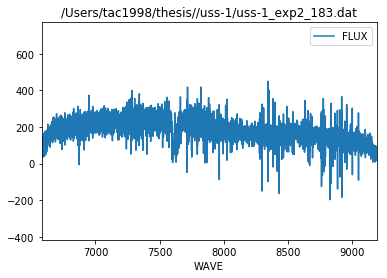

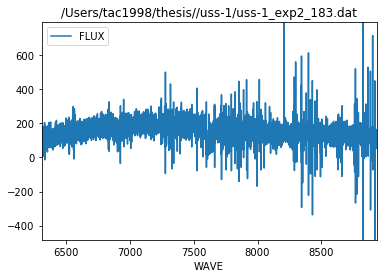

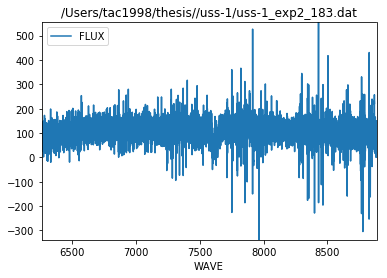

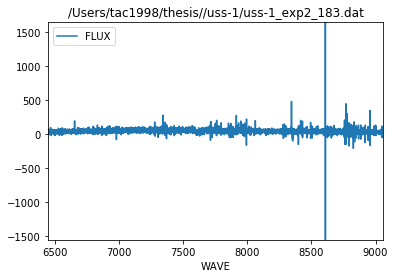

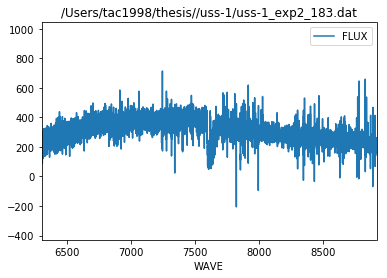

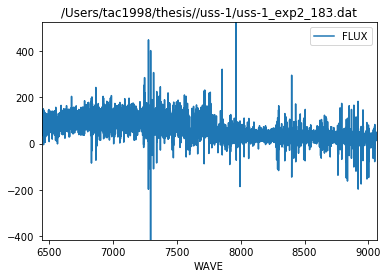

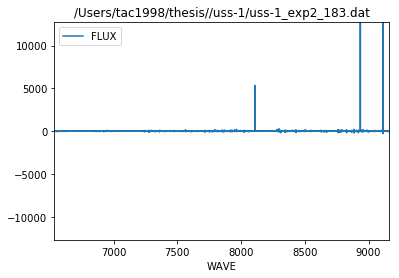

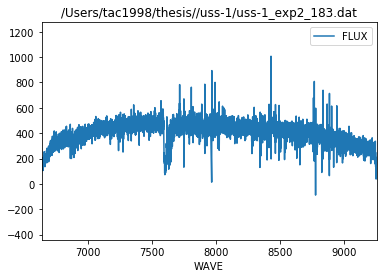

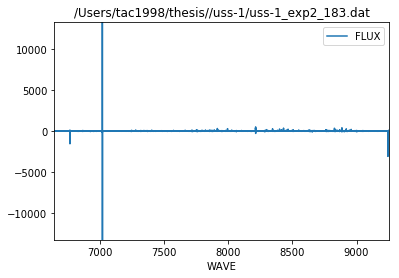

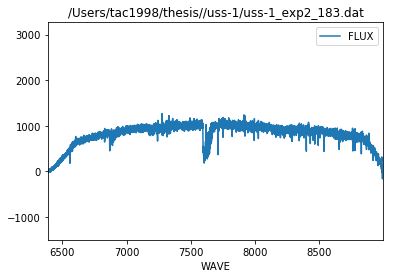

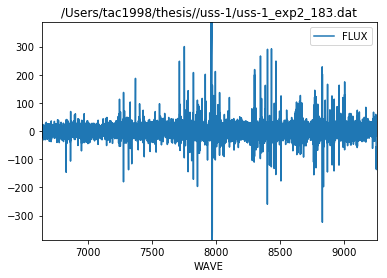

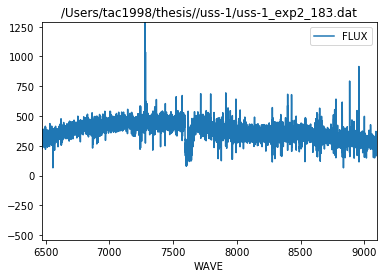

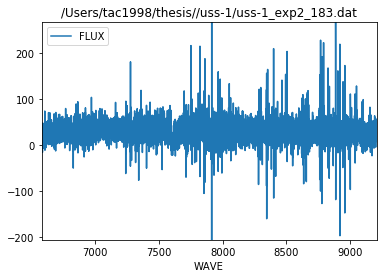

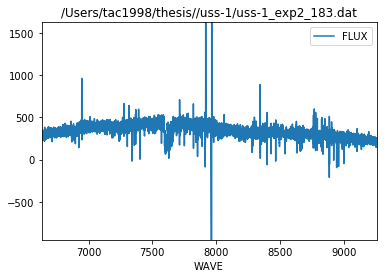

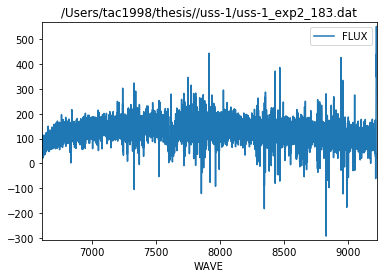

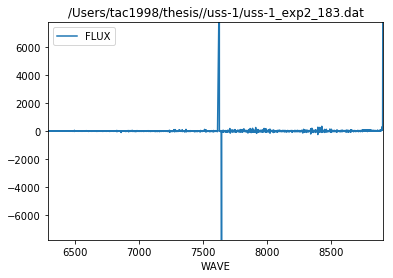

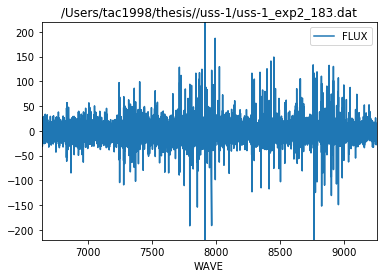

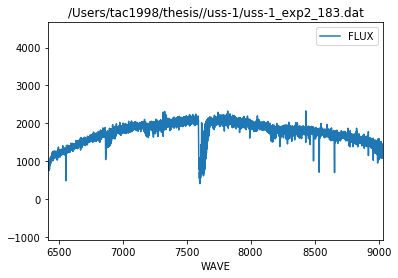

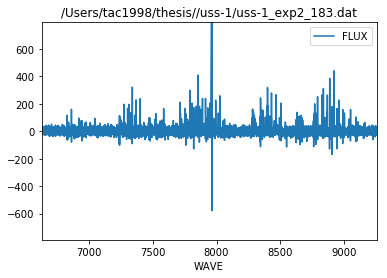

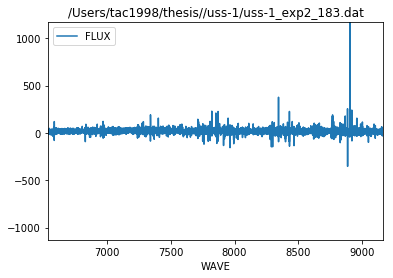

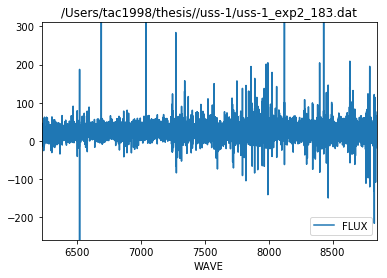

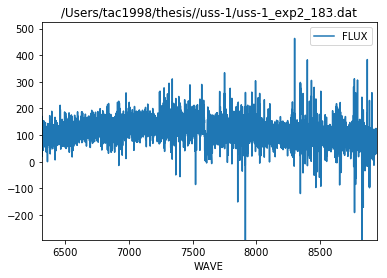

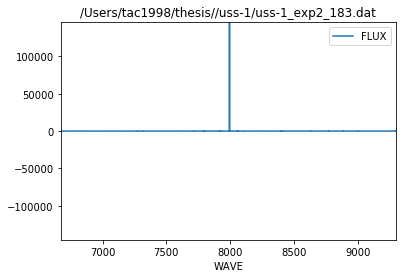

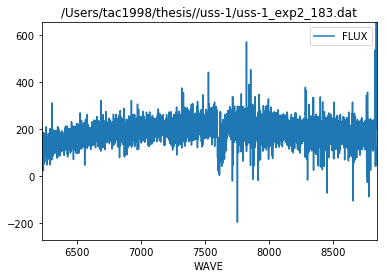

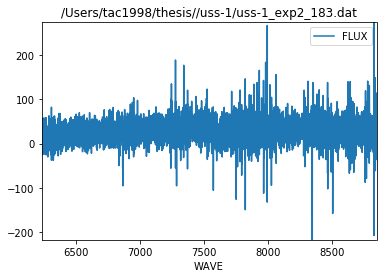

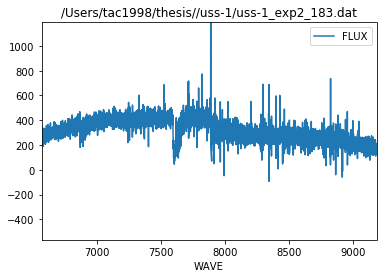

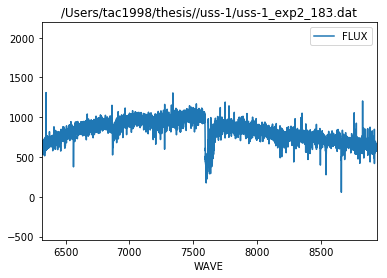

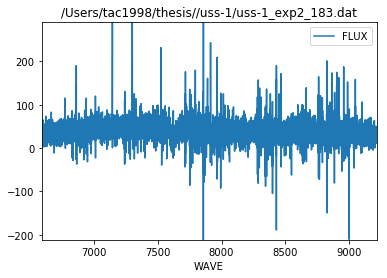

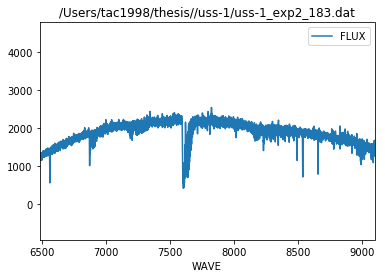

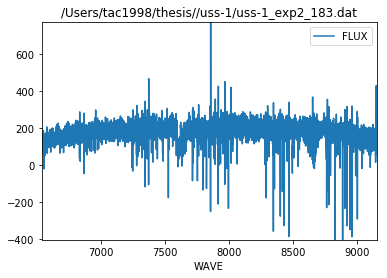

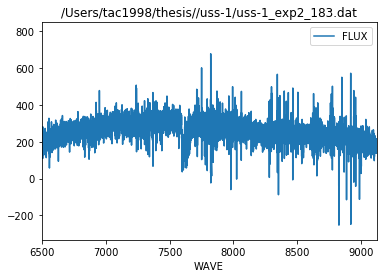

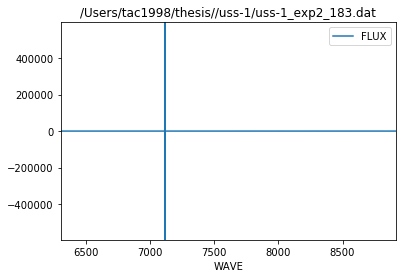

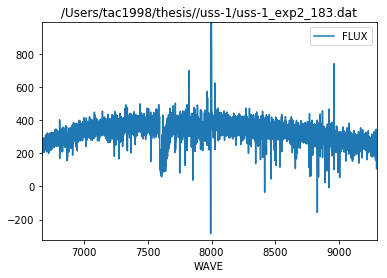

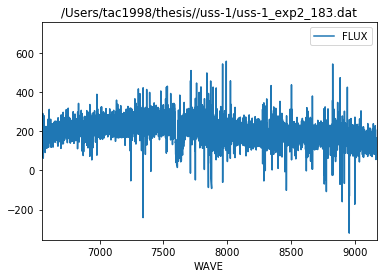

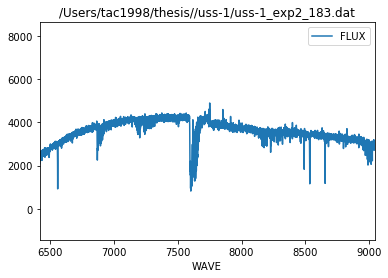

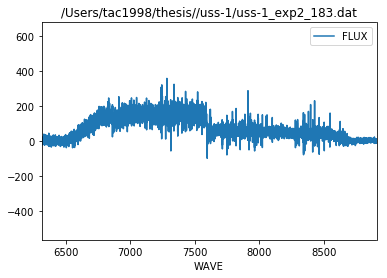

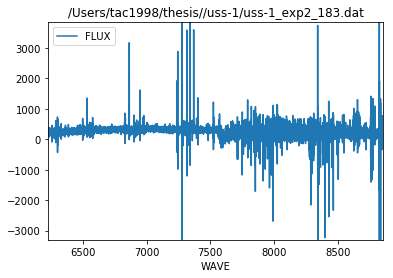

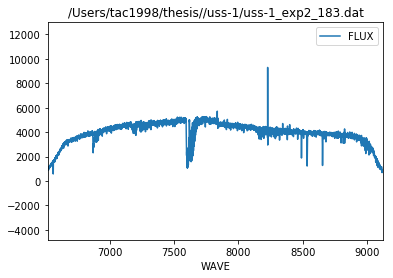

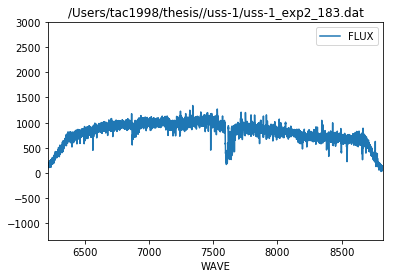

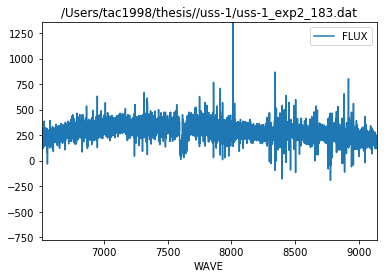

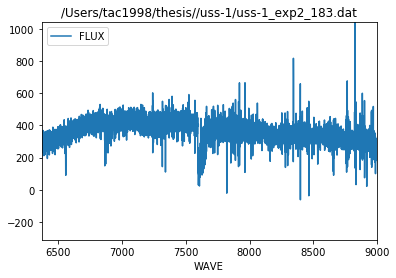

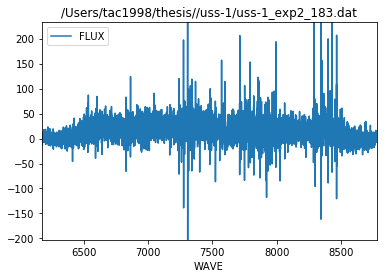

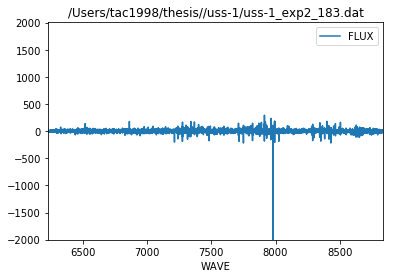

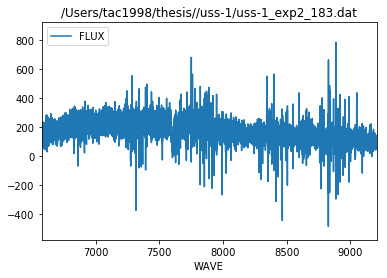

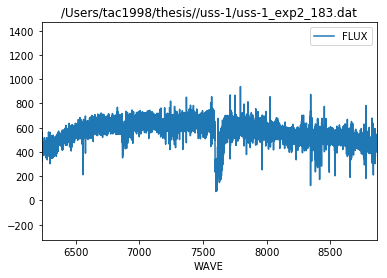

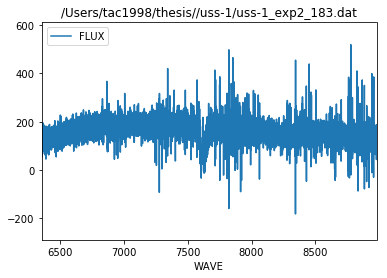

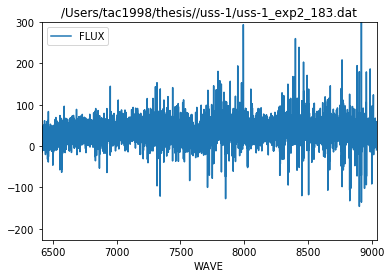

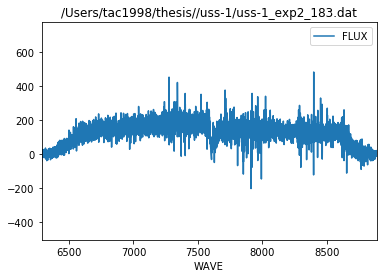

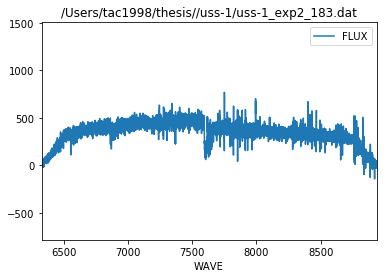

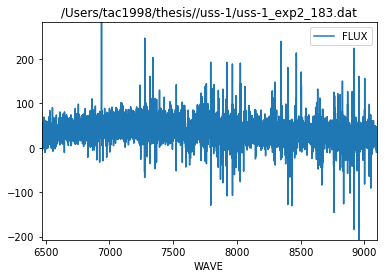

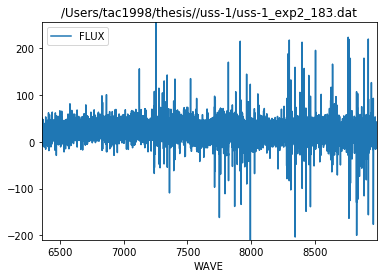

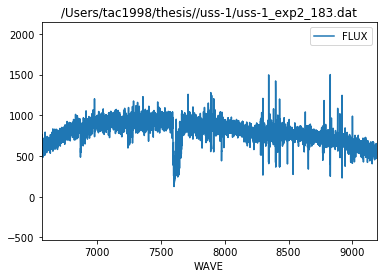

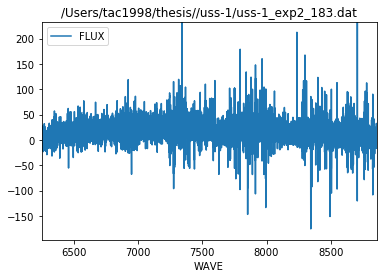

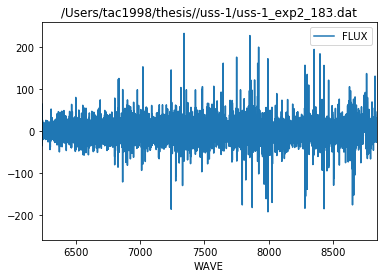

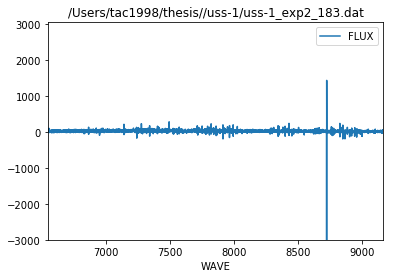

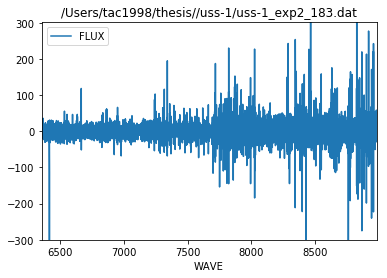

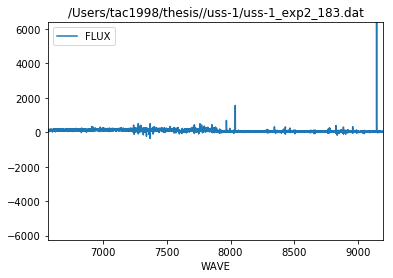

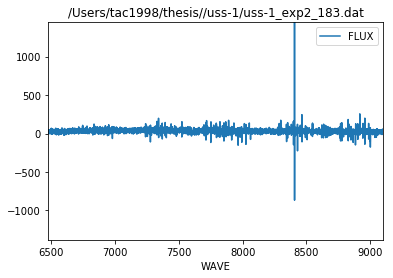

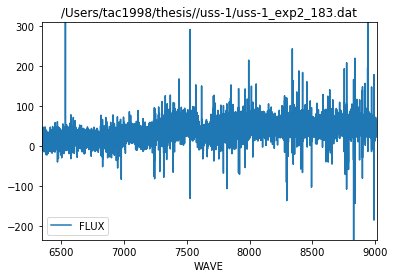

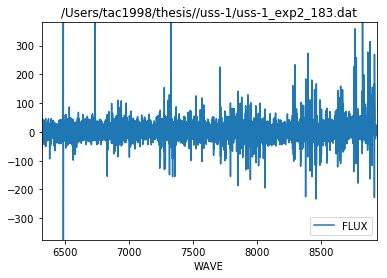

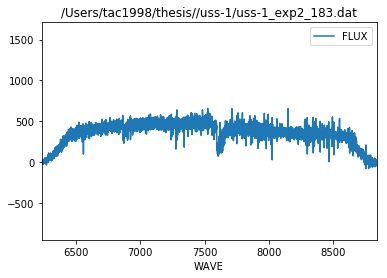

In [49]:
for file in folder_2:
    med = file['FLUX'].median()
    std = file['FLUX'].std()
    file.plot(x='WAVE', y='FLUX', title=name, ylim=[med - 10*std, med + 10*std])

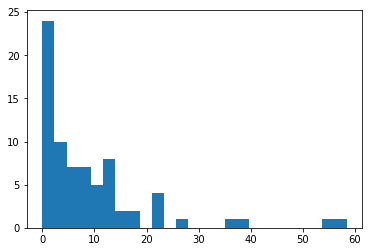

In [10]:
SN_folder2 = []
for file in folder_2:
    SN_median = file.loc[:,'S/N'].median()
    SN_folder2.append(SN_median)
    
plt.hist(SN_folder2, bins=25);

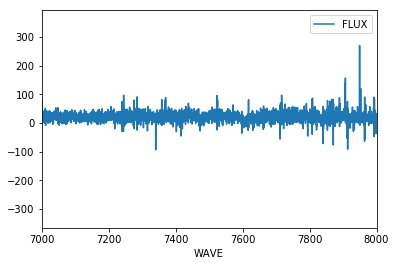

In [42]:
file_name = DEIMOS_DATA + '/dra1_exp2/dra1_exp2_128.dat'
one_df = pd.read_csv(file_name, sep='\s+')
med = one_df['FLUX'].median()
std = one_df['FLUX'].std()

one_df.plot(x='WAVE', y='FLUX', xlim=[7000,8000], ylim=[med - (std/10),med + (std/10)])

In [27]:
med = one_df['SKY'].mean()

ylim=[mean - std, mean + std]

In [36]:
min

-2521.2694096719588